In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE,RFECV
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,classification_report

In [2]:
import gdown
import pandas as pd

# Updated file ID for the new dataset from your link
file_id = '1Hze1lgYT6RDfI12hIXaf7HReHxpdiXNm'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'Merged.csv'
gdown.download(url, output=output_file, quiet=False)

# Read the downloaded CSV file into a pandas DataFrame
data = pd.read_csv(output_file)

# Display the first few rows of the dataframe
print(data.head())

# Create a copy of the dataframe
df = data.copy()


Downloading...
From: https://drive.google.com/uc?id=1Hze1lgYT6RDfI12hIXaf7HReHxpdiXNm
To: /content/Merged.csv
100%|██████████| 2.21M/2.21M [00:00<00:00, 96.1MB/s]


   Survey ID   Age  Gender     Ethnicity Marital Status  Education Completed  \
0    1011601  23.0  Female       Chinese         Single                 16.0   
1      10786  34.0  Female  Asian Indian        Married                 17.0   
2      10809  28.0    Male  Asian Indian        Married                 17.0   
3      10856  25.0    Male  Asian Indian         Single                 17.0   
4      10103  60.0  Female  Asian Indian         Single                 17.0   

   Household Size Household Category Full Time Employment  \
0             3.0             Family                   No   
1             3.0             Family                  Yes   
2             2.0             Family                  Yes   
3             1.0              Alone                  Yes   
4             3.0             Family                   No   

  Part Time Employment  ...             Informed  \
0                   No  ...       Not interested   
1                   No  ...  Somewhat interested

In [3]:
#df = pd.read_csv('Merged.csv')

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
df.head()

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Household Category,Full Time Employment,Part Time Employment,Student,Homemaker,Retired,Income,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Present Oral Health,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Heart Disease,Stroke,Diabetes,Cancer,Arthritis,Hepatitis,Kidney Problem,Asthma,COPD,Physical Check-up,Dentist Check-up,Urgentcare,Folkmedicine,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,Language,users,Family,Close Friend,Acquaintances,Heal Professionals,Mobile Apps,Email,Social Networks,Online Communities,Health Website,Other,Satisfied With Life 1,Satisfied With Life 2,Psychiatrist,General Practitioner,Therapist/Counselor,Religious Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Preference,Knowledge,Education (AD),Services (AD),Language Barrier (AD),Aging (AD),Avoidance (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Concern for Self & Others (AD),Planning and Preparedness,Diagnosed and Cure (AD),Fate (AD) and Embarrassing (AD),Family Connectivity Score,Friends Connectivity Score,Religious Connectivity Score,Family Relationship Score,Family Values Score,Family Expression Score,Family Dynamics Score,Community Engagement Score,Community Trust Score,Residency,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Aware of AARC,Visit Frequency,Activities,District,Housing,Status of Ownership,Satisfaction With Housing.,Nursing Home,Smoke Detector,Recycle,Compost,Access to a Computer,Mobile Devices,Home Phone,Informed,City Effort Satisfaction,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Mode of Transport,Awareness of Services,Civic Engagement,Quality of Life
0,1011601,23.0,Female,Chinese,Single,16.0,3.0,Family,No,No,No,No,No,"$0 - $9,999",No,11.0,Yes,Well,Much,Low,Very high,Very close,Not very much,No,Very Good,Good,Good,No,No,No,No,Yes,0,No,No,0,No,0,No,No,No,No,Yes,0,0,0,Yes,0,0,0,0,0,0,0,Yes,English,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,Disagree,Disagree,No,0,No,0,0,0,0,0,Yes,Yes,0,0,Yes,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0_1.0,0,2.000000,4.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Poor,Good,Good,Pretty much satisfied,Pretty much satisfied,Never used,Never used,Pretty much satisfied,Never used,Never used,No,Never,Never,No,Apartment/ Townhouse/ Condominium,Own,Pretty much,No,Yes,No,Yes,Yes,Yes,No,Not interested,Somewhat dissatisfied,1,1,2,1,Public Transportation,Aware,Not Engaged,8.0
1,10786,34.0,Female,Asian Indian,Married,17.0,3.0,Family,Yes,No,No,No,No,"$70,000 and over",No,1.0,Yes,Very well,Not at all,Very high,High,Very close,Very much,No,Excellent,Excellent,Excellent,Yes,No,No,Yes,Yes,0,No,No,0,No,0,No,No,No,No,Yes,Yes,0,0,Yes,Yes,Yes,0,0,0,0,0,0,English,Yes,Yes,No,No,No,No,No,No,No,No,No,Slightly agree,Agree,No,0,No,0,0,0,0,0,0,0,0,0,Yes,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0_1.0,0,3.000000,3.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,No,Never,Never,No,One-family house,Own,Pretty much,No,Yes,Yes,No,Yes,Yes,No,Somewhat interested,Niether satisfied or dissatisfied,1,1,0,0,Car,Aware,Not Engaged,5.0
2,10809,28.0,Male,Asian Indian,Married,17.0,2.0,Family,Yes,No,No,No,No,"$70,000 and over",No,7.0,No,W

In [6]:
df.head()

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Household Category,Full Time Employment,Part Time Employment,Student,Homemaker,Retired,Income,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Present Oral Health,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Heart Disease,Stroke,Diabetes,Cancer,Arthritis,Hepatitis,Kidney Problem,Asthma,COPD,Physical Check-up,Dentist Check-up,Urgentcare,Folkmedicine,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,Language,users,Family,Close Friend,Acquaintances,Heal Professionals,Mobile Apps,Email,Social Networks,Online Communities,Health Website,Other,Satisfied With Life 1,Satisfied With Life 2,Psychiatrist,General Practitioner,Therapist/Counselor,Religious Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Preference,Knowledge,Education (AD),Services (AD),Language Barrier (AD),Aging (AD),Avoidance (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Concern for Self & Others (AD),Planning and Preparedness,Diagnosed and Cure (AD),Fate (AD) and Embarrassing (AD),Family Connectivity Score,Friends Connectivity Score,Religious Connectivity Score,Family Relationship Score,Family Values Score,Family Expression Score,Family Dynamics Score,Community Engagement Score,Community Trust Score,Residency,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Aware of AARC,Visit Frequency,Activities,District,Housing,Status of Ownership,Satisfaction With Housing.,Nursing Home,Smoke Detector,Recycle,Compost,Access to a Computer,Mobile Devices,Home Phone,Informed,City Effort Satisfaction,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Mode of Transport,Awareness of Services,Civic Engagement,Quality of Life
0,1011601,23.0,Female,Chinese,Single,16.0,3.0,Family,No,No,No,No,No,"$0 - $9,999",No,11.0,Yes,Well,Much,Low,Very high,Very close,Not very much,No,Very Good,Good,Good,No,No,No,No,Yes,0,No,No,0,No,0,No,No,No,No,Yes,0,0,0,Yes,0,0,0,0,0,0,0,Yes,English,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,Disagree,Disagree,No,0,No,0,0,0,0,0,Yes,Yes,0,0,Yes,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0_1.0,0,2.000000,4.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Poor,Good,Good,Pretty much satisfied,Pretty much satisfied,Never used,Never used,Pretty much satisfied,Never used,Never used,No,Never,Never,No,Apartment/ Townhouse/ Condominium,Own,Pretty much,No,Yes,No,Yes,Yes,Yes,No,Not interested,Somewhat dissatisfied,1,1,2,1,Public Transportation,Aware,Not Engaged,8.0
1,10786,34.0,Female,Asian Indian,Married,17.0,3.0,Family,Yes,No,No,No,No,"$70,000 and over",No,1.0,Yes,Very well,Not at all,Very high,High,Very close,Very much,No,Excellent,Excellent,Excellent,Yes,No,No,Yes,Yes,0,No,No,0,No,0,No,No,No,No,Yes,Yes,0,0,Yes,Yes,Yes,0,0,0,0,0,0,English,Yes,Yes,No,No,No,No,No,No,No,No,No,Slightly agree,Agree,No,0,No,0,0,0,0,0,0,0,0,0,Yes,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0_1.0,0,3.000000,3.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,No,Never,Never,No,One-family house,Own,Pretty much,No,Yes,Yes,No,Yes,Yes,No,Somewhat interested,Niether satisfied or dissatisfied,1,1,0,0,Car,Aware,Not Engaged,5.0
2,10809,28.0,Male,Asian Indian,Married,17.0,2.0,Family,Yes,No,No,No,No,"$70,000 and over",No,7.0,No,W

In [7]:
df.shape

(2565, 148)

In [8]:
df.drop(columns='Survey ID',axis=1, inplace=True)

In [9]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Completed',
       'Household Size', 'Household Category', 'Full Time Employment',
       'Part Time Employment', 'Student',
       ...
       'Informed', 'City Effort Satisfaction', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General', 'Mode of Transport',
       'Awareness of Services', 'Civic Engagement', 'Quality of Life'],
      dtype='object', length=147)

In [10]:
df_num = df.select_dtypes(include=['int64','float64']).columns

In [11]:
df_num

Index(['Age', 'Education Completed', 'Household Size', 'Duration of Residency',
       'Knowledge', 'Education (AD)', 'Services (AD)', 'Language Barrier (AD)',
       'Aging (AD)', 'Avoidance (AD)', 'Nursing Home (AD)',
       'Advanced Directives', 'Have an Advanced Directive', 'Superstition',
       'Concern for Self & Others (AD)', 'Planning and Preparedness',
       'Fate (AD) and Embarrassing (AD)', 'Family Connectivity Score',
       'Friends Connectivity Score', 'Religious Connectivity Score',
       'Family Relationship Score', 'Family Values Score',
       'Family Expression Score', 'Family Dynamics Score',
       'Community Engagement Score', 'Community Trust Score', 'Residency ',
       '3-1-1_9-1-1', 'City-based', 'Non-city-based Ethnic',
       'Non-city-based General', 'Quality of Life'],
      dtype='object')

In [12]:
df_num = ['Age', 'Education Completed', 'Household Size',
       'Duration of Residency', 'Family Connectivity Score',
       'Friends Connectivity Score', 'Religious Connectivity Score',
       'Family Relationship Score', 'Family Values Score',
       'Family Expression Score', 'Family Dynamics Score',
       'Community Engagement Score', 'Community Trust Score', 'Residency ']

In [13]:
# Convert all columns except those in df_num to categorical
for col in df.columns:
    if col not in df_num:
        df[col] = df[col].astype('object')

# Check if conversion was successful
print(df.dtypes)


Age                       float64
Gender                     object
Ethnicity                  object
Marital Status             object
Education Completed       float64
                           ...   
Non-city-based General     object
Mode of Transport          object
Awareness of Services      object
Civic Engagement           object
Quality of Life            object
Length: 147, dtype: object


In [14]:
df_cat = df.select_dtypes(include=['object','category']).columns


In [15]:
for i in df_cat:
    print(df[i].value_counts())
    print('\n')


Gender
Female    1421
Male      1144
Name: count, dtype: int64


Ethnicity
Chinese         630
Asian Indian    568
Vietnamese      495
Korean          467
Filipino        262
Other           143
Name: count, dtype: int64


Marital Status
Married                  1717
Single                    717
Living with a partner     102
Other                      29
Name: count, dtype: int64


Household Category
Family                 2035
With Friends            235
Alone                   208
Other                    69
Family with Friends      18
Name: count, dtype: int64


Full Time Employment
No     1435
Yes    1130
Name: count, dtype: int64


Part Time Employment
No     2303
Yes     262
Name: count, dtype: int64


Student
No     2168
Yes     397
Name: count, dtype: int64


Homemaker
No     2310
Yes     255
Name: count, dtype: int64


Retired
No     2247
Yes     318
Name: count, dtype: int64


Income
$70,000 and over     1175
$0 - $9,999           246
$10,000 - $19,999     203
$30,000 - $39,

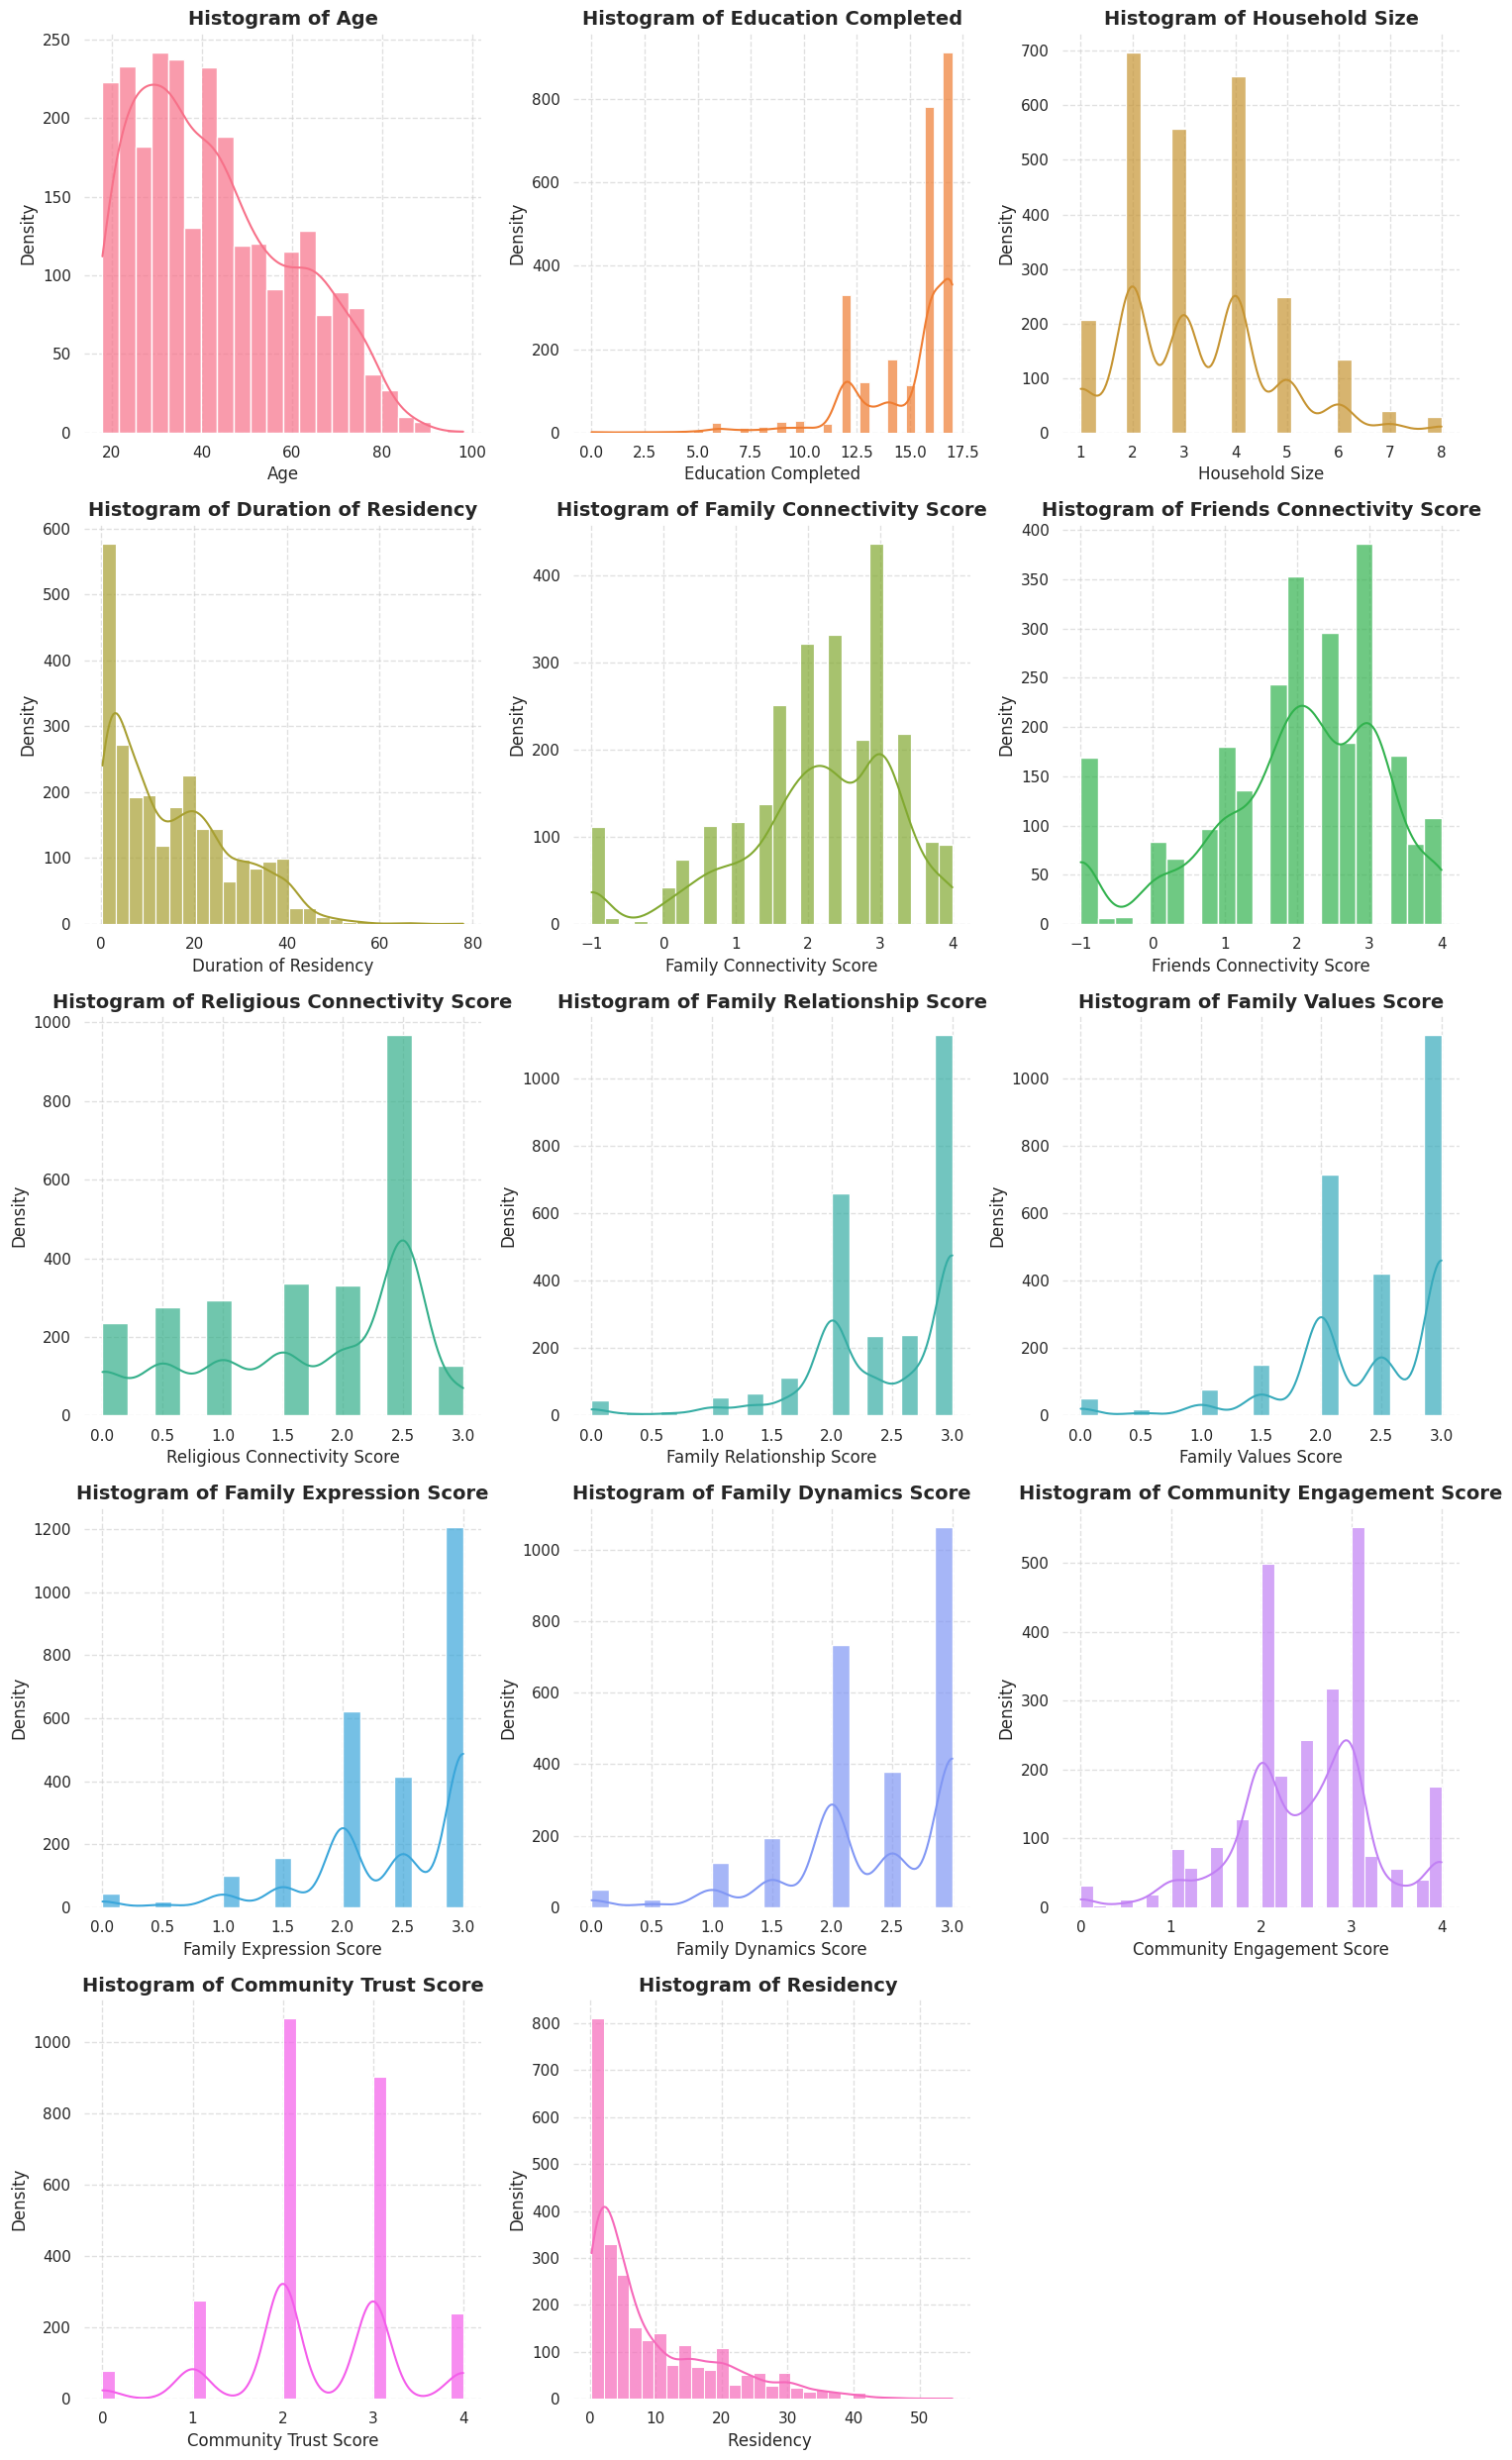

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style='whitegrid')  # Use a clean white background with gridlines
palette = sns.color_palette("husl", len(df_num))  # Set a nice color palette (you can choose other palettes too)

n_cols = 3  # Number of plots per row
n_rows = (len(df_num) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Create subplots grid
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each numerical column
for i, col in enumerate(df_num):
    sns.histplot(df[col], fill=True, kde=True, color=palette[i], ax=axes[i], alpha=0.7)  # Set transparency and KDE
    axes[i].set_title(f'Histogram of {col}', fontsize=14, fontweight='bold')  # Bold and larger titles
    axes[i].set_xlabel(col, fontsize=12)  # Larger x-axis labels
    axes[i].set_ylabel('Density', fontsize=12)  # Larger y-axis labels
    axes[i].grid(True, linestyle='--', alpha=0.6)  # Add gridlines with transparency
    sns.despine(left=True, bottom=True)  # Remove the spines for cleaner plots

# Remove any empty subplots if the number of columns is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



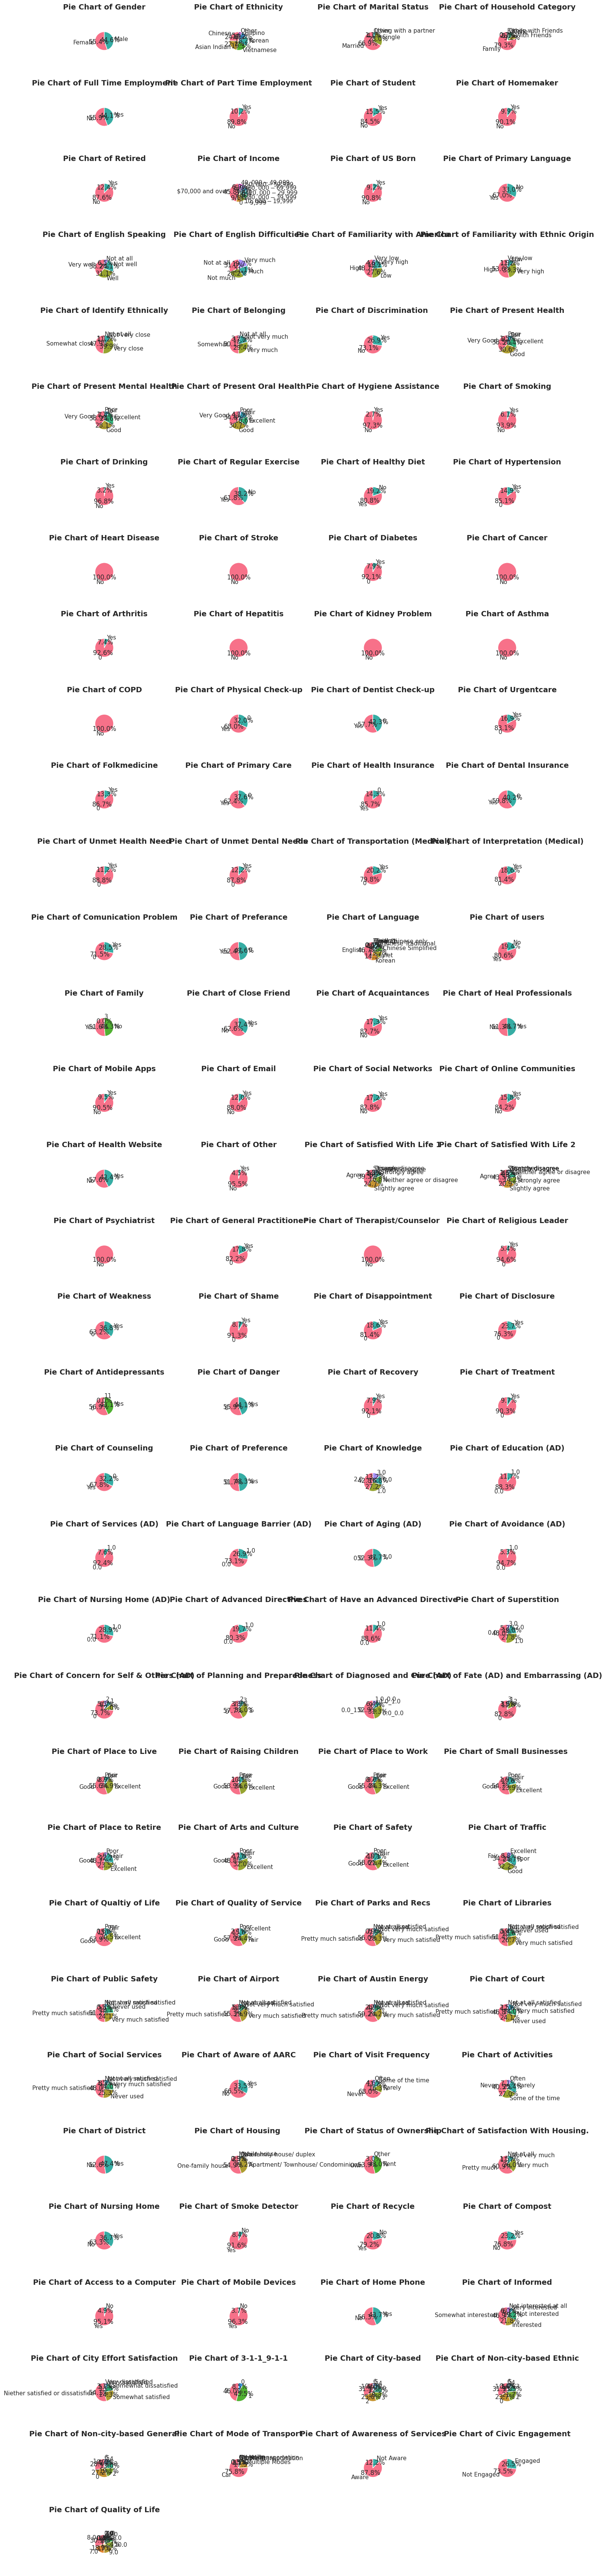

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame
categorical_columns = df.select_dtypes(include=['category', 'object']).columns  # Get categorical columns from df

n_cols = 4  # Number of plots per row
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2))  # Create subplots grid
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each categorical column as a pie chart
for i, col in enumerate(categorical_columns):
    values = df[col].value_counts()  # Get the counts of each category in the column
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(values)))
    axes[i].set_title(f'Pie Chart of {col}', fontsize=14, fontweight='bold')  # Bold and larger titles
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Remove any empty subplots if the number of columns is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [18]:
len(df_cat) + len(df_num)

147

## RESPONSE VARIABLE

In [19]:
y = df['Quality of Life']

In [20]:
class_counts = y.value_counts()
class_counts

,count
Quality of Life,
8.0,783
7.0,486
9.0,435
10.0,344
6.0,218
5.0,211
4.0,48
3.0,23
2.0,11


<ipython-input-21-bd342538deb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


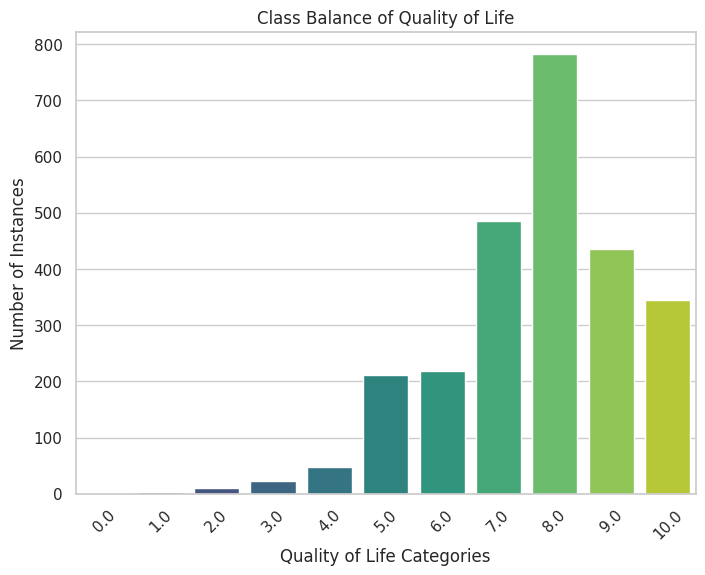

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Balance of Quality of Life')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

#Encode type I
Yes
No  

#Encode type II
Pretty much satisfied     
Very much satisfied        
Not very much satisfied     
Never used                 
Not at all satisfied        

#Encode type III
Never               
Rarely              
Some of the time     
Often               
     
#Encode type IV
Somewhat interested      
Interested               
Not interested            
Very interested           
Not interested at all     


#Encode type V
Niether satisfied or dissatisfied    
Somewhat satisfied                   
Somewhat dissatisfied                
Very satisfied                        
Very dissatisfied                      

#Encode type VI
Good        
Excellent     
Fair        
Poor       

Ordinal
Income
$70,000 and over     1174
$0 - $9,999           245
$30,000 - $39,999     202
$10,000 - $19,999     202
$20,000 - $29,999     194
$60,000 - $69,999     189
$50,000 - $59,999     177
$40,000 - $49,999     175
Name: count, dtype: int64

#Encoding VII
Other Encodings
Value counts for column 'Housing ':
Housing
One-family house                     1382
Apartment/ Townhouse/ Condominium    1006
Two-family house/ duplex               69
Other                                  58
Mobile house                           24
Name: count, dtype: int64

Value counts for column 'Status of Ownership':
Status of Ownership
Own      1350
Rent     1104
Other      78
Name: count, dtype: int64

Value counts for column 'Other Transportation':
Other Transportation
0.0    2512
1.0      26
Name: count, dtype: int64

**Quality of Life variable mapping**

In [22]:
y = df['Quality of Life']

In [23]:
X = df.drop(columns=['Quality of Life'],axis=1)

In [24]:
def recategorize_quality_of_life(value):
    if value in [0, 1, 2, 3]:
        return 0
    elif value in [4, 5, 6, 7]:
        return 1
    elif value in [8, 9, 10]:
        return 2
    else:
        return None

In [25]:
df['Quality of Life Category'] = y.apply(recategorize_quality_of_life)

<ipython-input-25-a175007ff61e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Quality of Life Category'] = y.apply(recategorize_quality_of_life)


In [26]:
y = df['Quality of Life Category']

In [27]:
class_counts_new = df['Quality of Life Category'].value_counts()
class_counts_new

,count
Quality of Life Category,
2,1562
1,963
0,40


<ipython-input-28-1f652ccd53d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_new.index, y=class_counts_new.values, palette=custom_palette)


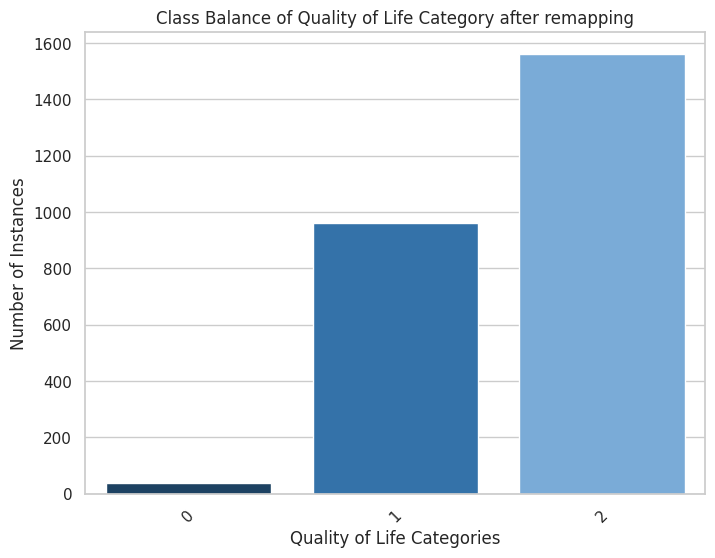

In [28]:
# Define your custom palette with dark blue, dark green, and light green#12436D
custom_palette = sns.color_palette(["#12436D", "#2073BC", "#6BACE6"])  # Dark blue, dark green, light green
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_new.index, y=class_counts_new.values, palette=custom_palette)
plt.title('Class Balance of Quality of Life Category after remapping')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [29]:
cat_df = X.select_dtypes(include=['object'])


In [30]:
from sklearn.model_selection import train_test_split

# X is the feature dataframe and y is the target variable (categorical)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Quality of Life Category'], random_state=42)


## Checking the significance of Categorical variables using Chi_Squared Test

In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Initialize a list to store the results
chi_square_results = []

# Loop through all categorical variables (assuming X is your data and y is your target variable)
for column in X_train[cat_df.columns].columns:
    if X_train[column].dtype == 'object':  # Check if the column is categorical
        # Create a contingency table for the categorical variable and the response (y)
        contingency_table = pd.crosstab(X_train[column], y_train)

        # Perform the Chi-Square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        # Append the result for the variable
        chi_square_results.append({
            'Variable': column,
            'Chi2 Statistic': chi2,
            'P-Value': p_value,
            'Significant (p < 0.05)': 'Yes' if p_value < 0.05 else 'No'
        })

# Convert the results into a pandas DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

# Sort the results by p-value for easy identification of significant variables
chi_square_df = chi_square_df.sort_values(by='P-Value')

# Display the table
print(chi_square_df)

                 Variable  Chi2 Statistic        P-Value  \
62  Satisfied With Life 1      607.836078  2.248299e-122   
63  Satisfied With Life 2      576.981938  8.689805e-116   
20  Present Mental Health      411.462298   6.609890e-84   
19         Present Health      284.747768   7.229869e-57   
12       English Speaking      266.544040   1.190316e-54   
..                    ...             ...            ...   
66   Therapist/Counselor         0.000000   1.000000e+00   
36                   COPD        0.000000   1.000000e+00   
64           Psychiatrist        0.000000   1.000000e+00   
34         Kidney Problem        0.000000   1.000000e+00   
33              Hepatitis        0.000000   1.000000e+00   

   Significant (p < 0.05)  
62                    Yes  
63                    Yes  
20                    Yes  
19                    Yes  
12                    Yes  
..                    ...  
66                     No  
36                     No  
64                     No  

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

significant_vars = []

for col in X_train[cat_df.columns].columns:
    contingency_table = pd.crosstab(y, X_train[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < 0.05:  # Adjust the significance level as needed
        significant_vars.append(col)

print("Significant variables:", significant_vars)


Significant variables: ['Ethnicity', 'Marital Status', 'Full Time Employment', 'Retired', 'Income', 'US Born', 'Primary Language', 'English Speaking', 'English Difficulties', 'Familiarity with America', 'Familiarity with Ethnic Origin', 'Identify Ethnically', 'Belonging', 'Present Health', 'Present Mental Health', 'Present Oral Health', 'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise', 'Healthy Diet', 'Hypertension', 'Arthritis', 'Physical Check-up', 'Dentist Check-up', 'Primary Care', 'Health Insurance', 'Dental Insurance', 'Unmet Health Need', 'Unmet Dental Needs', 'Transportation (Medical)', 'Interpretation (Medical)', 'Comunication Problem', 'Preferance', 'Language', 'users', 'Heal Professionals', 'Health Website', 'Satisfied With Life 1', 'Satisfied With Life 2', 'Weakness', 'Shame', 'Disappointment', 'Disclosure', 'Danger', 'Recovery', 'Treatment', 'Preference', 'Knowledge', 'Services (AD)', 'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives', 'Have

## Checking the significance of Numerical variables using Kruskal Wallis

In [33]:
import pandas as pd
from scipy.stats import kruskal

# Initialize an empty list to hold significant variables
significant_num = []

# Loop through each numeric variable and perform the Kruskal-Wallis test
for var in df_num:
    grouped = [X_train[var][y == group] for group in sorted(y.unique())]
    stat, p_value = kruskal(*grouped)

    print(f"Variable: {var}")
    print(f"Kruskal-Wallis test statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check significance (using alpha = 0.05)
    if p_value < 0.05:
        print(f"{var} is significantly associated with the ordinal response.\n")
        significant_num.append(var)  # Add to significant_num list
    else:
        print(f"{var} is not significantly associated with the ordinal response.\n")

# Display the significant variables
print("Significant numeric variables:", significant_num)

Variable: Age
Kruskal-Wallis test statistic: 18.196205647126533
P-value: 0.00011187785931608364
Age is significantly associated with the ordinal response.

Variable: Education Completed
Kruskal-Wallis test statistic: 46.39854855722465
P-value: 8.407815957179509e-11
Education Completed is significantly associated with the ordinal response.

Variable: Household Size
Kruskal-Wallis test statistic: 1.1485113714206547
P-value: 0.5631238539906636
Household Size is not significantly associated with the ordinal response.

Variable: Duration of Residency
Kruskal-Wallis test statistic: 46.06715993953099
P-value: 9.923007523987634e-11
Duration of Residency is significantly associated with the ordinal response.

Variable: Family Connectivity Score
Kruskal-Wallis test statistic: 7.775734876683675
P-value: 0.020488993522920763
Family Connectivity Score is significantly associated with the ordinal response.

Variable: Friends Connectivity Score
Kruskal-Wallis test statistic: 3.2625248442120234
P-valu

In [34]:
len(significant_vars)+len(significant_num)

102

## Nominal variables

In [35]:
cat_df = significant_vars

In [36]:

#Encoding Yes and No columns into Nominal type 1
nominal_type1 = []
# Iterate through the columns in cat_df
for col in cat_df:
    if (X[col].isin(['Yes', 'No'])).any():  # Check if any entry is 'Yes' or 'No'
        nominal_type1.append(col)

# Print the Type I encoding columns
print(f'Type I encoding:', nominal_type1)

#Encode categories with Other
nominal_type2 = []
for col in cat_df:
    if (X[col] == 'Other').any():
        nominal_type2.append(col)
print(f'type_nominal_1 encoding:',nominal_type2)


Type I encoding: ['Full Time Employment', 'Retired', 'US Born', 'Primary Language', 'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise', 'Healthy Diet', 'Hypertension', 'Arthritis', 'Physical Check-up', 'Dentist Check-up', 'Primary Care', 'Health Insurance', 'Dental Insurance', 'Unmet Health Need', 'Unmet Dental Needs', 'Transportation (Medical)', 'Interpretation (Medical)', 'Comunication Problem', 'Preferance', 'users', 'Heal Professionals', 'Health Website', 'Weakness', 'Shame', 'Disappointment', 'Disclosure', 'Danger', 'Recovery', 'Treatment', 'Preference', 'District', 'Nursing Home', 'Smoke Detector', 'Recycle', 'Access to a Computer', 'Mobile Devices']
type_nominal_1 encoding: ['Ethnicity', 'Marital Status', 'Housing ', 'Status of Ownership']


## Ordinal Variables

In [37]:
#Encode type I
type1_columns = []
for col in cat_df:
    if (X[col] == 'Pretty much satisfied').any():
        type1_columns.append(col)
print(f'Type II encoding:',type1_columns)

#Encode type II

type2_columns = []
for col in cat_df:
    if (X[col] == 'Rarely').any():
        type2_columns.append(col)
print(f'Type III encoding:',type2_columns)

#Encode type III
type3_columns = []
for col in cat_df:
    if (X[col] == 'Interested').any():
        type3_columns.append(col)
print(f'Type IV encoding:',type3_columns)

#Encode type IV
type4_columns = []
for col in cat_df:
    if (X[col] == 'Very satisfied').any():
        type4_columns.append(col)
print(f'Type V encoding:',type4_columns)

#Encode type V
type5_columns = []
for col in cat_df:
    if (X[col] == 'Excellent').any():
        type5_columns.append(col)
print(f'Type VI encoding:',type5_columns)



Type II encoding: ['Parks and Recs', 'Libraries', 'Public Safety', 'Airport', 'Austin Energy', 'Court', 'Social Services']
Type III encoding: ['Visit Frequency ']
Type IV encoding: ['Informed']
Type V encoding: ['City Effort Satisfaction']
Type VI encoding: ['Present Health', 'Present Mental Health', 'Present Oral Health', 'Place to Live', 'Raising Children', 'Place to Work', 'Small Businesses ', 'Place to Retire', 'Arts and Culture', 'Safety', 'Traffic', 'Qualtiy of Life', 'Quality of Service']


In [38]:
X_train_new =X_train[significant_vars+significant_num]
X_test_new = X_test[significant_vars+significant_num]

In [39]:
'''from lazypredict.Supervised import LazyClassifier

# Instantiate LazyClassifier with updated arguments
clf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)

# Assuming you have already prepared your data: X_train_new, X_test_new, y_train_new, y_test_new
models, predictions = clf.fit(X_train_new, X_test_new, y_train, y_test)

print(models)'''

'from lazypredict.Supervised import LazyClassifier\n\n# Instantiate LazyClassifier with updated arguments\nclf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)\n\n# Assuming you have already prepared your data: X_train_new, X_test_new, y_train_new, y_test_new\nmodels, predictions = clf.fit(X_train_new, X_test_new, y_train, y_test)\n\nprint(models)'

In [40]:
ordinal_cols = type1_columns+type2_columns+type3_columns+type4_columns+type5_columns
nominal_cols = nominal_type1+nominal_type2

identified_cols = ordinal_cols+nominal_cols

# Display columns that are not in the exclude list
no_type_cols = X[cat_df].columns[~X[cat_df].columns.isin(identified_cols)]

In [41]:
cat_col = X.select_dtypes(include=['object'])

In [42]:
cat_col [identified_cols]

,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Visit Frequency,Informed,City Effort Satisfaction,Present Health,Present Mental Health,Present Oral Health,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Full Time Employment,Retired,US Born,Primary Language,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Arthritis,Physical Check-up,Dentist Check-up,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,users,Heal Professionals,Health Website,Weakness,Shame,Disappointment,Disclosure,Danger,Recovery,Treatment,Preference,District,Nursing Home,Smoke Detector,Recycle,Access to a Computer,Mobile Devices,Ethnicity,Marital Status,Housing,Status of Ownership
0,Pretty much satisfied,Pretty much satisfied,Never used,Never used,Pretty much satisfied,Never used,Never used,Never,Not interested,Somewhat dissatisfied,Very Good,Good,Good,Good,Good,Good,Good,Good,Good,Good,Poor,Good,Good,No,No,No,Yes,No,No,No,No,Yes,0,0,Yes,0,Yes,0,0,0,0,0,0,0,Yes,Yes,Yes,Yes,0,0,0,0,Yes,0,0,0,No,No,Yes,No,Yes,Yes,Chinese,Single,Apartment/ Townhouse/ Condominium,Own
1,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,Yes,Yes,No,No,Yes,Yes,0,0,Yes,Yes,Yes,Yes,Yes,0,0,0,0,0,0,Yes,No,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Married,One-family house,Own
2,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Very Good,Very Good,Very Good,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,No,No,No,No,Yes,No,0,0,Yes,Yes,0,Yes,Yes,0,0,0,Yes,0,0,Yes,No,Yes,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Married,One-family house,Own
3,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,No,No,Yes,No,Yes,Yes,0,0,Yes,Yes,Yes,Yes,Yes,0,0,Yes,0,0,0,Yes,Yes,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Single,One-family house,Own
4,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Interested,Niether satisfied or dissatisfied,Good,Excellent,Very Good,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,No,Yes,No,Yes,No,No,No,Yes,Yes,0,Yes,Yes,Yes,0,Yes,Yes,0,0,0,0,0,0,Yes,Yes,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Single,One-family house,Own
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,Very much satisfied,Very much satisfied,Very much satisfied,Pretty much satisfied,Very much satisfied,Pretty much satisfied,Pretty much satisfied,Often,Interested,Somewhat satisfied,Very Good,Excellent,Very Good,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,0,Yes,Yes,Yes,Yes,Yes,0,0,0,0,0,0,Yes,Yes,Yes,0,0,0,0,0,0,0,0,Yes,No,Yes,Yes,Yes,Yes,Other,Single,One-family house,Other
2561,Very much satisfied,Very much satisfied,Very much satisfied,Pretty much satisfied,Not very much satisfied,Not very much satisfied,Pretty much satisfied,Often,Somewhat 

In [43]:
cat_col [no_type_cols]

,Income,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Language,Satisfied With Life 1,Satisfied With Life 2,Knowledge,Services (AD),Language Barrier (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Satisfaction With Housing.,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Awareness of Services,Civic Engagement
0,"$0 - $9,999",Well,Much,Low,Very high,Very close,Not very much,English,Disagree,Disagree,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Pretty much,1,1,2,1,Aware,Not Engaged
1,"$70,000 and over",Very well,Not at all,Very high,High,Very close,Very much,English,Slightly agree,Agree,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,0,0,Aware,Not Engaged
2,"$70,000 and over",Well,Much,High,High,Somewhat close,Not very much,English,Slightly agree,Agree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,0,0,0,Aware,Not Engaged
3,"$50,000 - $59,999",Very well,Not at all,Very high,Low,Not very close,Not very much,English,Strongly agree,Strongly agree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,0,0,Aware,Not Engaged
4,"$70,000 and over",Very well,Not at all,Low,High,Not very close,Not very much,English,Agree,Agree,2.0,0.0,0.0,1.0,1.0,1.0,0.0,Very much,1,1,1,1,Aware,Not Engaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,"$30,000 - $39,999",Well,Not much,High,Very high,Somewhat close,Somewhat,Eng_Chinese only,Agree,Agree,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,2,3,Aware,Engaged
2561,"$60,000 - $69,999",Well,Not at all,High,High,Not at all,Somewhat,English,Neither agree or disagree,Agree,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Very much,2,4,2,2,Aware,Engaged
2562,"$10,000 - $19,999",Well,Much,High,High,Somewhat close,Somewhat,English,Agree,Agree,2.0,0.0,0.0,0.0,1.0,1.0,3.0,Very much,1,1,0,0,Aware,Not Engaged
2563,"$10,000 - $19,999",Not well,Much,Low,Low,Somewhat close,Somewhat,English,Agree,Agree,3.0,0.0,0.0,0.0,1.0,1.0,3.0,Pretty much,2,2,2,1,Aware,Engaged


In [44]:
rem = cat_col [no_type_cols].columns
rem

Index(['Income', 'English Speaking', 'English Difficulties',
       'Familiarity with America', 'Familiarity with Ethnic Origin',
       'Identify Ethnically', 'Belonging', 'Language', 'Satisfied With Life 1',
       'Satisfied With Life 2', 'Knowledge', 'Services (AD)',
       'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives',
       'Have an Advanced Directive', 'Superstition',
       'Satisfaction With Housing.', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General',
       'Awareness of Services', 'Civic Engagement'],
      dtype='object')

In [45]:
nominal_type3 = ['Language', 'Knowledge', 'Services (AD)',
       'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives',
       'Have an Advanced Directive', 'Superstition', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General', 'Awareness of Services', 'Civic Engagement']

In [46]:
difference = np.setdiff1d(rem, nominal_type3)
cat_col[difference]

,Belonging,English Difficulties,English Speaking,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Income,Satisfaction With Housing.,Satisfied With Life 1,Satisfied With Life 2
0,Not very much,Much,Well,Low,Very high,Very close,"$0 - $9,999",Pretty much,Disagree,Disagree
1,Very much,Not at all,Very well,Very high,High,Very close,"$70,000 and over",Pretty much,Slightly agree,Agree
2,Not very much,Much,Well,High,High,Somewhat close,"$70,000 and over",Pretty much,Slightly agree,Agree
3,Not very much,Not at all,Very well,Very high,Low,Not very close,"$50,000 - $59,999",Pretty much,Strongly agree,Strongly agree
4,Not very much,Not at all,Very well,Low,High,Not very close,"$70,000 and over",Very much,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...
2560,Somewhat,Not much,Well,High,Very high,Somewhat close,"$30,000 - $39,999",Pretty much,Agree,Agree
2561,Somewhat,Not at all,Well,High,High,Not at all,"$60,000 - $69,999",Very much,Neither agree or disagree,Agree
2562,Somewhat,Much,Well,High,High,Somewhat close,"$10,000 - $19,999",Very much,Agree,Agree
2563,Somewhat,Much,Not well,Low,Low,Somewhat close,"$10,000 - $19,999",Pretty much,Agree,Agree


In [47]:
cat_col[difference].columns

Index(['Belonging', 'English Difficulties', 'English Speaking',
       'Familiarity with America', 'Familiarity with Ethnic Origin',
       'Identify Ethnically', 'Income', 'Satisfaction With Housing.',
       'Satisfied With Life 1', 'Satisfied With Life 2'],
      dtype='object')

In [48]:
for col in difference:
    print(cat_col [col].value_counts())

Belonging
Somewhat         1286
Very much         755
Not very much     441
Not at all         83
Name: count, dtype: int64
English Difficulties
Not at all    796
Not much      723
Much          541
Very much     505
Name: count, dtype: int64
English Speaking
Very well     980
Well          798
Not well      619
Not at all    168
Name: count, dtype: int64
Familiarity with America
High         1249
Low           709
Very high     490
Very low      117
Name: count, dtype: int64
Familiarity with Ethnic Origin
High         1374
Very high     854
Low           288
Very low       49
Name: count, dtype: int64
Identify Ethnically
Somewhat close    1228
Very close        1023
Not very close     286
Not at all          28
Name: count, dtype: int64
Income
$70,000 and over     1175
$0 - $9,999           246
$10,000 - $19,999     203
$30,000 - $39,999     202
$20,000 - $29,999     195
$60,000 - $69,999     190
$50,000 - $59,999     177
$40,000 - $49,999     177
Name: count, dtype: int64
Satisfactio

In [49]:
type6_columns=['English Difficulties']
type7_columns= ['English Speaking']
type8_columns=['Familiarity with America', 'Familiarity with Ethnic Origin']
type9_columns=['Identify Ethnically']
type10_columns=['Income']
type11_columns= ['Satisfied With Life 1', 'Satisfied With Life 2']
type12_columns=['Belonging']
type13_columns=['Satisfaction With Housing.']

In [50]:
# Define custom orders for each categorical column
custom_orders = {
    'type1_columns': ['Pretty much satisfied', 'Very much satisfied', 'Never used', 'Not very much satisfied', 'Not at all satisfied'],
    'type2_columns': ['Never', 'Rarely', 'Some of the time', 'Often'],
    'type3_columns': ['Not interested at all', 'Not interested', 'Somewhat interested', 'Interested', 'Very interested'],
    'type4_columns': ['Niether satisfied or dissatisfied', 'Somewhat dissatisfied', 'Somewhat satisfied', 'Very dissatisfied', 'Very satisfied'],
    'type5_columns': ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
    'type6_columns': ['Not at all', 'Not much', 'Much', 'Very much'],
    'type7_columns': ['Not at all','Well','Not well','Very well'],
    'type8_columns': ['Very low','Low','High','Very high'],
    'type9_columns': ['Not at all','Not very close', 'Somewhat close', 'Very close'],
    'type10_columns': ['$0 - $9,999', '$10,000 - $19,999', '$20,000 - $29,999',  '$30,000 - $39,999', '$40,000 - $49,999', '$50,000 - $59,999', '$60,000 - $69,999' '$70,000 and over'],
    'type11_columns': ['Strongly disagree','Disagree','Slightly disagree','Neither agree or disagree','Slightly agree','Agree','Strongly agree'],
    'type12_columns': ['Not at all', 'Not very much', 'Somewhat', 'Very much'],
    'type13_columns': ['Not at all', 'Not very much', 'Pretty much', 'Very much']
}


In [51]:
X_test.head(4)

,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Household Category,Full Time Employment,Part Time Employment,Student,Homemaker,Retired,Income,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Present Oral Health,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Heart Disease,Stroke,Diabetes,Cancer,Arthritis,Hepatitis,Kidney Problem,Asthma,COPD,Physical Check-up,Dentist Check-up,Urgentcare,Folkmedicine,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,Language,users,Family,Close Friend,Acquaintances,Heal Professionals,Mobile Apps,Email,Social Networks,Online Communities,Health Website,Other,Satisfied With Life 1,Satisfied With Life 2,Psychiatrist,General Practitioner,Therapist/Counselor,Religious Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Preference,Knowledge,Education (AD),Services (AD),Language Barrier (AD),Aging (AD),Avoidance (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Concern for Self & Others (AD),Planning and Preparedness,Diagnosed and Cure (AD),Fate (AD) and Embarrassing (AD),Family Connectivity Score,Friends Connectivity Score,Religious Connectivity Score,Family Relationship Score,Family Values Score,Family Expression Score,Family Dynamics Score,Community Engagement Score,Community Trust Score,Residency,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Aware of AARC,Visit Frequency,Activities,District,Housing,Status of Ownership,Satisfaction With Housing.,Nursing Home,Smoke Detector,Recycle,Compost,Access to a Computer,Mobile Devices,Home Phone,Informed,City Effort Satisfaction,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Mode of Transport,Awareness of Services,Civic Engagement
870,26.0,Male,Asian Indian,Living with a partner,17.0,2.0,Family,Yes,No,No,No,No,"$70,000 and over",No,4.0,Yes,Well,Much,Low,High,Somewhat close,Somewhat,No,Good,Good,Good,No,No,No,No,Yes,0,No,No,0,No,0,No,No,No,No,0,0,0,0,0,Yes,Yes,0,0,0,0,0,0,English,No,No,No,No,No,No,No,No,Yes,Yes,No,Slightly agree,Agree,No,Yes,No,0,0,0,0,0,0,0,0,0,Yes,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0_1.0,0,2.333333,2.666667,1.0,3.0,3.0,3.0,3.0,2.50,3.0,2.0,Good,Good,Good,Good,Good,Good,Fair,Fair,Good,Good,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,No,Never,Never,No,Apartment/ Townhouse/ Condominium,Rent,Pretty much,No,Yes,No,No,Yes,Yes,No,Interested,Niether satisfied or dissatisfied,1,2,2,2,Multiple Modes,Not Aware,Not Engaged
1130,85.0,Female,Asian Indian,Single,5.0,3.0,Family,No,No,No,No,Yes,"$0 - $9,999",No,35.0,Yes,Not well,Much,Low,High,Somewhat close,Somewhat,No,Fair,Fair,Fair,Yes,No,No,Yes,Yes,Yes,No,No,0,No,Yes,No,No,No,No,Yes,0,Yes,0,Yes,Yes,0,0,Yes,0,Yes,Yes,Yes,Gujarati,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Slightly disagree,Neither agree or disagree,No,Yes,No,0,0,0,0,0,Yes,Yes,0,0,Yes,Yes,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2,1,0.0_1.0,0,2.333333,2.000000,2.0,2.0,2.0,2.0,2.5,3.00,3.0,12.0,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Fair,Pretty much satisfied,Pretty much satisfied,Very much satisfied,Pretty much satisfied,Never used,Pretty much satisfied,Not very much satisfied,No,Never,Rarely,No,One-family house,Own,Pretty much,No,Yes,Yes,Yes,No,No,Yes,Interested,Niether satisfied or dissatisfied,1,2,2,2,Car,Aware,Not Engaged
1438,25.0,Male,Korean,Married,14.0,2.0,Family,Yes,No,No,No,No,"$60,000 - $69,999",

In [52]:
X_test[type2_columns].columns

Index(['Visit Frequency '], dtype='object')

In [53]:
df_nominal = nominal_type1+nominal_type2+nominal_type3

In [54]:
custom_orders['type2_columns']

['Never', 'Rarely', 'Some of the time', 'Often']

In [55]:
X_train.shape

(2052, 146)

In [56]:
X_train.dropna()
X_train.shape

(2052, 146)

In [57]:
df_ordinal = type1_columns + type2_columns+type3_columns+type4_columns+type5_columns+type6_columns+type7_columns+type8_columns+type9_columns+type10_columns+type11_columns+type12_columns+type13_columns
len(df_ordinal) ,len(df_nominal)

(33, 57)

### Handling Imbalance of the response variable using SMOTENC

## Implementing a Pipeline to preprocess

In [58]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df_num and df_nominal are already defined DataFrames containing the corresponding features
numerical_features = significant_num# Specify the actual numerical columns
nominal_features = df_nominal  # Specify the actual nominal columns

# Numerical transformer (e.g., scaling numerical features)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Nominal transformer (e.g., one-hot encoding categorical nominal features)
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Create the transformers for ordinal columns
ordinal_transformers = [
    (key, OrdinalEncoder(categories=[custom_orders[key] for i in range(len(globals()[key]))], handle_unknown='use_encoded_value', unknown_value=-1), globals()[key])
    for key in custom_orders.keys()
]

# Using ColumnTransformer to apply different preprocessing steps to numerical, ordinal, and nominal categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nominal', nominal_transformer, nominal_features),
        *ordinal_transformers  # Expanding the list of ordinal transformers
    ]
)

# Define the final pipeline to preprocess the data before fitting the model
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [59]:
# Apply preprocessing to training data
X_train_preprocessed = pipeline.fit_transform(X_train)

In [60]:
# Apply preprocessing to testing data
X_test_preprocessed = pipeline.transform(X_test)

## Clustering

In [61]:
# Check the dimensionality of X_train
print("Dimensionality of X_train:", X_train_preprocessed.shape)

# Check the dimensionality of y_train
print("Dimensionality of y_train:", y_train.shape)

# Check the dimensionality of X_train
print("Dimensionality of X_test:", X_test_preprocessed.shape)

# Check the dimensionality of y_train
print("Dimensionality of y_test:", y_test.shape)


Dimensionality of X_train: (2052, 139)
Dimensionality of y_train: (2052,)
Dimensionality of X_test: (513, 139)
Dimensionality of y_test: (513,)


In [62]:
X_test=X_test_preprocessed
X_train=X_train_preprocessed

X_test=pd.DataFrame(X_test)
X_train=pd.DataFrame(X_train)


X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
0,-0.971130,0.784321,-0.895668,0.193057,-0.766036,0.858088,0.868345,0.820578,0.919916,0.016299,0.693149,-0.738481,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,-1.0,4.0,5.0,2.0,2.0
1,2.470997,-4.310143,1.522493,0.193057,0.333968,-0.646866,-0.598193,-0.617975,0.217659,0.653340,0.693149,0.316861,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,2.0,2.0
2,-1.029471,-0.489295,-0.583648,0.776921,0.883971,-0.646866,0.135076,-0.617975,-1.889113,0.334819,-2.617189,-0.421878,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,-1.0,5.0,5.0,2.0,0.0
3,-1.204494,-0.489295,-0.427637,1.360785,0.333968,-0.646866,-1.331463,-1.337252,-0.484599,-0.302222,-0.410297,0.105792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,2.0,2.0,0.0,4.0,3.0,1.0,2.0
4,0.720763,0.359782,1.288477,1.652718,1.433973,0.858088,0.868345,0.820578,0.919916,-0.620743,-2.617189,2.427544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,2.0,2.0,0.0,3.0,3.0,2.0,2.0,-1.0,6.0,6.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [63]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
0,0.195693,0.359782,1.522493,1.652718,0.883971,0.858088,0.868345,0.820578,0.919916,0.016299,-0.410297,-0.421878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0
1,-0.621083,0.359782,-1.051679,0.776921,0.883971,0.356436,0.135076,0.820578,-0.484599,-1.257784,-1.513743,-0.844015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,5.0,5.0,2.0,2.0
2,-1.321177,-1.762911,-1.051679,-0.390808,0.333968,-2.151820,-2.064732,-2.056529,-1.889113,-1.894826,-1.513743,-0.738481,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,3.0,4.0,3.0,2.0,2.0,1.0
3,0.312375,-1.338373,0.352415,-1.558537,0.883971,-0.646866,0.135076,0.101302,-0.484599,1.290381,0.693149,1.161134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,5.0,6.0,2.0,3.0
4,0.137352,0.784321,-0.583648,1.068853,-0.216034,0.858088,0.868345,0.820578,0.919916,-0.620743,-0.410297,-0.738481,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,3.0,3.0,2.0,4.0,4.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [64]:
pip install kmodes

In [65]:
#import important libraries
import pandas as pd
import numpy as np
import sys
import os
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from tabulate import tabulate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score


In [67]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00


Completed for k=2
Completed for k=3
Completed for k=4
Completed for k=5
Completed for k=6
Completed for k=7
Completed for k=8
Completed for k=9
Completed for k=10


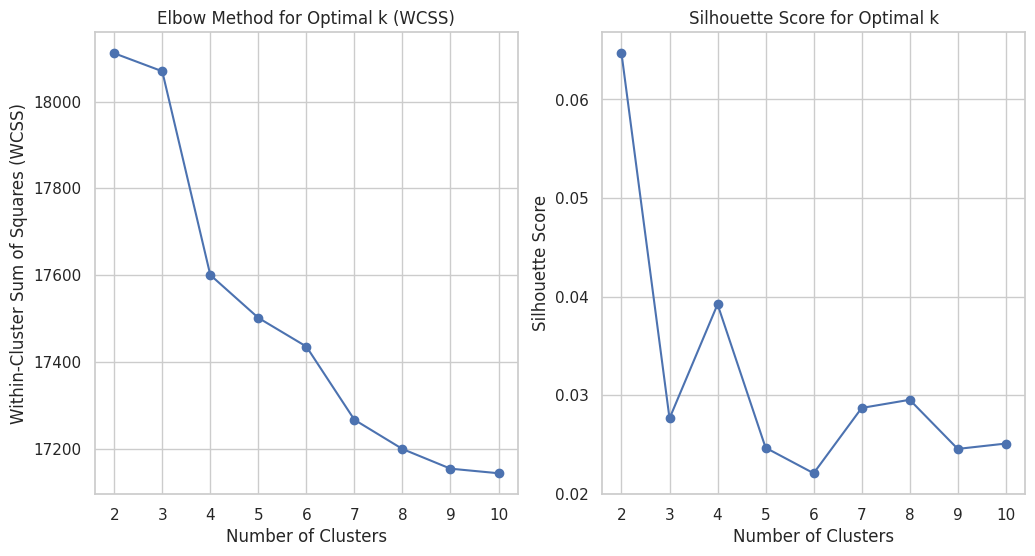

In [69]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import numpy as np

# Set random seed for reproducibility
np.random.seed(28)

# Variables to store WCSS and silhouette scores for different k values
wcss = []
silhouette_scores = []

# Loop over different values of k
for k in range(2, 11):
    kmedoids = KMedoids(n_clusters=k, init='random', random_state=28)
    clusters = kmedoids.fit_predict(X_train)  # Fit the model on the training data

    # Calculate within-cluster sum of squares (WCSS)
    wcss.append(kmedoids.inertia_)

    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X_train, clusters)
    silhouette_scores.append(silhouette_avg)

    print(f"Completed for k={k}")

# Elbow curve for WCSS
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()


In [72]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Set random seed for reproducibility
np.random.seed(28)

# Set number of clusters
n_clusters = 4

# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=n_clusters, init='random', random_state=28)

# Fit the model to the training data
clusters = kmedoids.fit_predict(X_train)  # Fit on numerical data (categorical data should be encoded if present)

# Print cluster medoids and labels
print("Cluster Medoids (Representative Points):")
print(kmedoids.cluster_centers_)  # This will give the representative points (medoids) for each cluster

print("\nCluster Labels:")
print(clusters)  # Cluster assignments for each sample

# Count the number of observations in each cluster
cluster_counts = np.bincount(clusters)

# Print the counts of observations in each cluster
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} observations")


Cluster Medoids (Representative Points):
[[ 0.07901073  0.35978205  0.04039392  1.06885316  0.88397063 -0.64686612
  -0.59819342 -0.6179751  -0.48459857 -0.62074285 -0.41029695 -0.42187849
   0.          0.          0.          1.          0.          0.
   0.          0.          1.          0.          0.          1.
   1.          1.          1.          1.          0.          0.
   1.          0.          0.          1.          1.          0.
   1.          1.          0.          1.          0.          0.
   0.          0.          1.          1.          1.          1.
   1.          1.          1.          0.          0.          1.
   0.          0.          1.          0.          0.          0.
   1.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.  

In [73]:
import numpy as np
from sklearn_extra.cluster import KMedoids  # Make sure you have sklearn-extra installed

# Set random seed for reproducibility
np.random.seed(28)

# Set the number of clusters
n_clusters = 4
kmedoids = KMedoids(n_clusters=n_clusters, init='random', random_state=28)

# Fit the model to the training data
clusters = kmedoids.fit_predict(X_train)  # Ensure categorical features are encoded

# Print cluster medoids (centroids) and labels
print("Cluster Medoids (Centroids):")
print(kmedoids.cluster_centers_)  # Access the medoids directly
print("\nCluster Labels:")
print(clusters)

# Count the observations in each cluster
cluster_counts = np.bincount(clusters)

# Print the counts of observations in each cluster
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} observations")


Cluster Medoids (Centroids):
[[ 0.07901073  0.35978205  0.04039392  1.06885316  0.88397063 -0.64686612
  -0.59819342 -0.6179751  -0.48459857 -0.62074285 -0.41029695 -0.42187849
   0.          0.          0.          1.          0.          0.
   0.          0.          1.          0.          0.          1.
   1.          1.          1.          1.          0.          0.
   1.          0.          0.          1.          1.          0.
   1.          1.          0.          1.          0.          0.
   0.          0.          1.          1.          1.          1.
   1.          1.          1.          0.          0.          1.
   0.          0.          1.          0.          0.          0.
   1.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          1.  

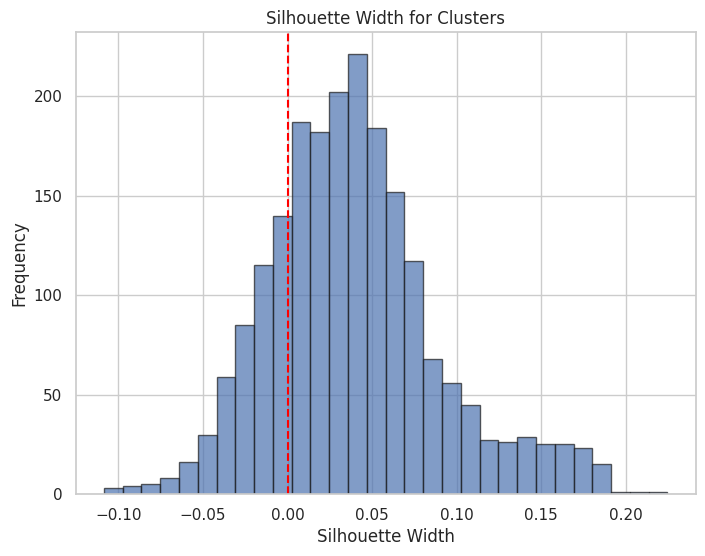

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X_train, clusters)

# Plot silhouette width for each sample
plt.figure(figsize=(8, 6))
plt.hist(silhouette_vals, bins=30, edgecolor='k', alpha=0.7)  # Added edge color for better visibility
plt.title('Silhouette Width for Clusters')
plt.xlabel('Silhouette Width')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')  # Optional: line at x=0 for reference
plt.grid(True)  # Optional: add grid for better readability
plt.show()


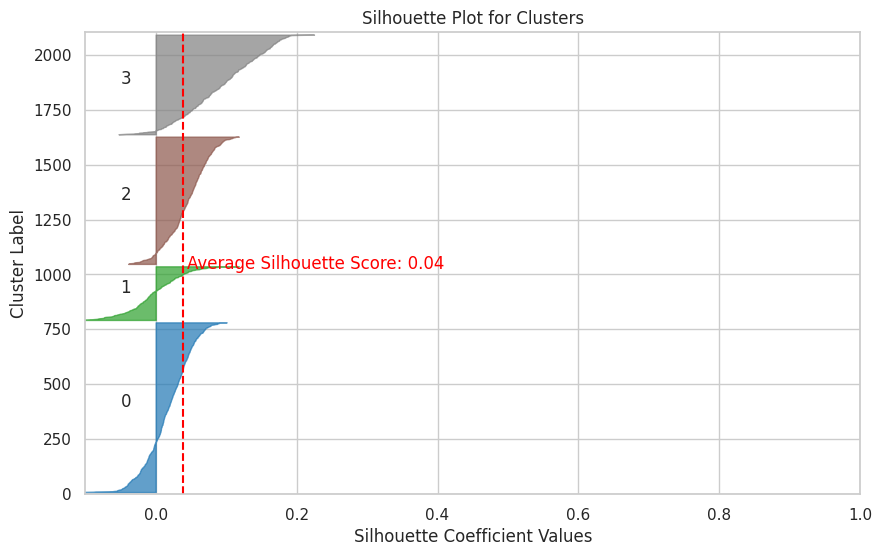

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(28)

def plot_silhouette(X, clusters):
    silhouette_vals = silhouette_samples(X, clusters)
    n_clusters = len(np.unique(clusters))

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust figure size for better visibility
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[clusters == i]
        cluster_silhouette_vals.sort()

        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab10(float(i) / n_clusters)  # Colormap for clusters
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    silhouette_avg = silhouette_score(X, clusters)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    ax.text(silhouette_avg + 0.005, 0.5 * len(X), 'Average Silhouette Score: {:.2f}'.format(silhouette_avg), color="red")
    ax.set_title("Silhouette Plot for Clusters")
    ax.grid(True)  # Optional: add grid for better readability

    plt.show()

# Call the function with your data
plot_silhouette(X_train, clusters)


In [76]:
from sklearn.metrics import silhouette_score

# Calculate the average silhouette value
silhouette_avg = silhouette_score(X_train, clusters)
print("Average Silhouette Value:", silhouette_avg)


Average Silhouette Value: 0.039214092817723485
